1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [2]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns


Scatter Plots with all Possible Combinations are as following:



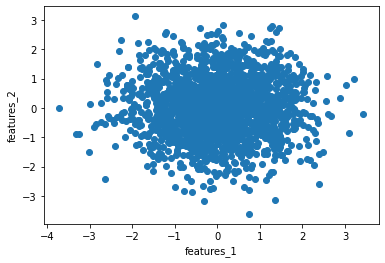

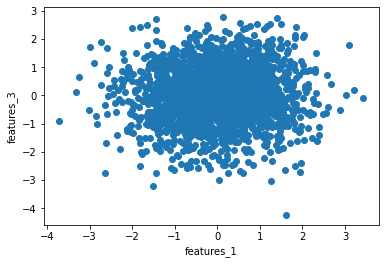

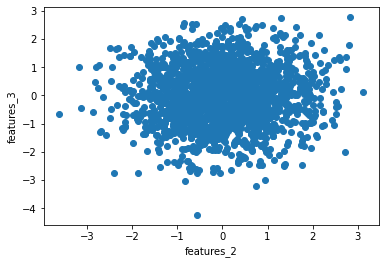

In [7]:
filename = "regression_generated.csv"
df = pd.read_csv(filename)

print("Scatter Plots with all Possible Combinations are as following:\n")
plt.scatter(df["features_1"], df["features_2"])
plt.xlabel('features_1')
plt.ylabel('features_2')
plt.show()
plt.scatter(df["features_1"], df["features_3"])
plt.xlabel('features_1')
plt.ylabel('features_3')
plt.show()
plt.scatter(df["features_2"], df["features_3"])
plt.xlabel('features_2')
plt.ylabel('features_3')
plt.show()

# From the plots, it can be said that the three features are not correlated to eachother and they are random

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

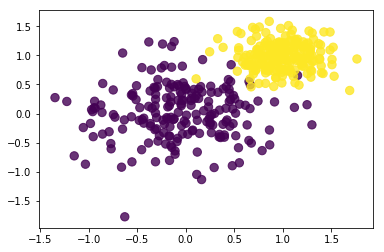

In [8]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

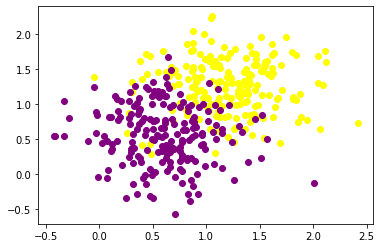

In [11]:
def gaussian(mean,dev) : 
    return np.random.normal(mean,dev,200)

x1 = gaussian(1.2,0.4)
y1 = gaussian(1.2,0.4)

x2 = gaussian(0.6,0.4)
y2 = gaussian(0.6,0.4)

plt.scatter(x1,y1, c ='yellow')
plt.scatter(x2,y2, c = 'purple')

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [13]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/


The sampled entries are:
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


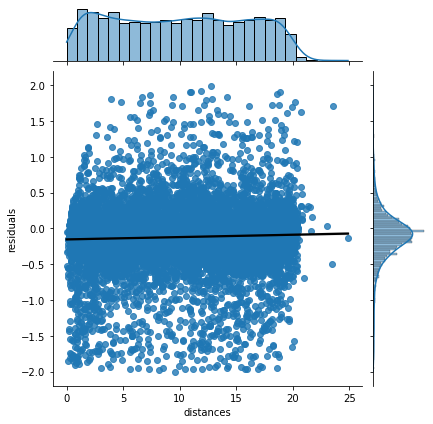

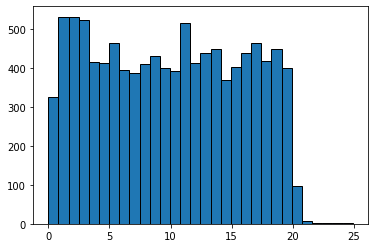

The array of bin centers of the profile histogram of the distance variable:
 [ 0.415  1.245  2.075  2.905  3.735  4.565  5.395  6.225  7.055  7.885
  8.715  9.545 10.375 11.205 12.035 12.865 13.695 14.525 15.355 16.185
 17.015 17.845 18.675 19.505 20.335 21.165 21.995 22.825 23.655 24.485]
The array of mean values of the residuals:
 [-0.22816161 -0.16864277 -0.16334425 -0.16718146 -0.13378049 -0.13917
 -0.13657911 -0.11918505 -0.0899215  -0.07545645 -0.10437874 -0.09111305
 -0.04557276 -0.08549622 -0.07124827 -0.12653403 -0.11783042 -0.14677773
 -0.12984828 -0.12642509 -0.17404372 -0.13714615 -0.11771333 -0.05974595
  0.05151488  0.1375      0.06333333  0.02857143  0.605              nan]
The array of standard deviation of the residuals:
 [0.46521669 0.4630088  0.40344238 0.41530126 0.43625561 0.37286803
 0.39548202 0.46306388 0.46731845 0.40465166 0.41315206 0.42566214
 0.42940939 0.46726397 0.49215896 0.48910147 0.45354926 0.47299582
 0.46500289 0.45637862 0.41004957 0.41113979 0.419

Text(0, 0.5, 'residuals')

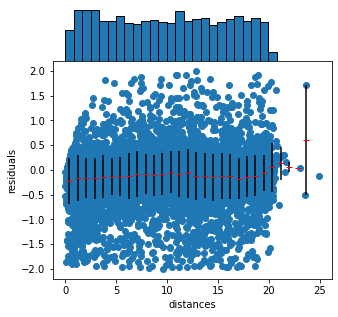

In [33]:
inputfile = open("./data/residuals_261.pkl", "rb") 
myfile = pickle.load(inputfile)
inputfile.close()

df = pd.DataFrame(myfile.tolist())
df = df[abs(df["residuals"])<2]
print("The sampled entries are:\n",df)

sns.jointplot(x = "distances", y = "residuals", data = df, kind="reg", line_kws={"color":"black"})
plt.show()

#From this plot of 'residuals' vs 'distances', there isn't correlation between them since the linear relationship is almost zero

h, bins, _ = plt.hist(df["distances"], bins = 30, edgecolor = "black")
plt.show()

x = (bins[:-1] + bins[1:])/2.
ylist = []
err_yList = []
for dlow, dhigh in zip(bins[:-1], bins[1:]):
    indices = (df["distances"] >= dlow) & (df["distances"] < dhigh)
    residual_mean = df["residuals"][indices].mean()
    ylist.append(residual_mean)
    residual_std = np.std(df["residuals"][indices])
    err_yList.append(residual_std)
    
y = np.array(ylist)
err_y = np.array(err_yList)
print("The array of bin centers of the profile histogram of the distance variable:\n", x)
print("The array of mean values of the residuals:\n", y)
print("The array of standard deviation of the residuals:\n", err_y)

figure = plt.figure(figsize=(5,5))
gridspace = figure.add_gridspec(2,1,hspace=0,height_ratios=(1, 4)) 

ax_scatt = figure.add_subplot(gridspace[1])
ax_hist = figure.add_subplot(gridspace[0], sharex=ax_scatt)

_,bins_edges,_=ax_hist.hist(df["distances"], bins = 30, edgecolor = "black") 
ax_hist.axis("off")
ax_scatt.errorbar(x,y,err_y,fmt="_",ecolor="k",color="r")
ax_scatt.scatter(y = df["residuals"], x = df["distances"]) 
ax_scatt.set_xlabel("distances")
ax_scatt.set_ylabel("residuals")

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


(array([ 2.,  3.,  1.,  1.,  4.,  5.,  5.,  7.,  2., 12.,  6.,  8.,  9.,
         7.,  1.,  5.,  4.,  4.,  2.,  4.,  3.,  3.,  0.,  0.,  2.]),
 array([ 8.36706609,  8.51389595,  8.66072581,  8.80755566,  8.95438552,
         9.10121537,  9.24804523,  9.39487509,  9.54170494,  9.6885348 ,
         9.83536465,  9.98219451, 10.12902437, 10.27585422, 10.42268408,
        10.56951393, 10.71634379, 10.86317365, 11.0100035 , 11.15683336,
        11.30366321, 11.45049307, 11.59732293, 11.74415278, 11.89098264,
        12.03781249]),
 <BarContainer object of 25 artists>)

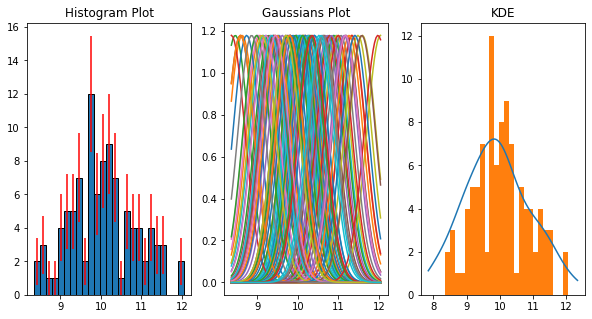

In [45]:
import scipy as sp

x = np.random.normal(10, 1, 100)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))

bins = ax[0].hist(x, bins = 25, edgecolor = "black")
ax[0].set_title("Histogram Plot") 
errors = np.sqrt(bins[0])
centers = (bins[1][:-1] + bins[1][1:])/2
ax[0].errorbar(centers, bins[0], yerr = errors, fmt = 'none', c = 'red')
    
std_new = 1.06 * x.std()*(x.size**(-1/5))
xlist = np.linspace(np.min(x), np.max(x), size)

pdf = []
for i in x:
    gaussian = sp.stats.norm.pdf(xlist, i, scale = std_new)
    pdf.append(gaussian)
    ax[1].plot(xlist, gaussian)
ax[1].set_title("Gaussians Plot")

myintegral = np.sum(pdf, axis = 0)
area_integral = sp.integrate.trapz(np.sum(pdf, axis = 0), xlist)
my_hist = sum(np.diff(bins[1])*bins[0])
k_norm = area_integral / my_hist
norm_sum_integral = myintegral / k_norm

ax[2].set_title("KDE")
ax[2].plot(x_grid, norm_sum_integral)
ax[2].hist(x, bins=25)
